In [1]:
import uproot

In [2]:
file = uproot.open("CD205112-3009-AB40-ACE1-9C3C31285B4A.root")

In [25]:
events = file['Events']
events.keys(filter_name="*[Jj]et*")

['boostedTau_jetIdx',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_rawPt',
 'Electron_jetPtRelv2',
 'Electron_jetRelIso',
 'Electron_jetIdx',
 'Electron_jetNDauCharged',
 'nFatJet',
 'FatJet_area',
 'FatJet_btagCSVV2',
 'FatJet_btagDDBvLV2',
 'FatJet_btagDDCvBV2',
 'FatJet_btagDDCvLV2',
 'FatJet_btagDeepB',
 'FatJet_btagHbb',
 'FatJet_deepTagMD_H4qvsQCD',
 'FatJet_deepTagMD_HbbvsQCD',
 'FatJet_deepTagMD_TvsQCD',
 'FatJet_deepTagMD_WvsQCD',
 'FatJet_deepTagMD_ZHbbvsQCD',
 'FatJet_deepTagMD_ZHccvsQCD',
 'FatJet_deepTagMD_ZbbvsQCD',
 'FatJet_deepTagMD_ZvsQCD',
 'FatJet_deepTagMD_bbvsLight',
 'FatJet_deepTagMD_ccvsLight',
 'FatJet_deepTag_H',
 'FatJet_deepTag_QCD',
 'FatJet_deepTag_QCDothers',
 'FatJet_deepTag_TvsQCD',
 'FatJet_deepTag_WvsQCD',
 'FatJet_deepTag_ZvsQCD',
 'FatJet_eta',
 'FatJet_mass',
 'FatJet_msoftdrop',
 'FatJet_n2b1',
 'FatJet_n3b1',
 'FatJet_particleNetMD_QCD',
 'FatJet_particleNetMD_Xb

In [50]:
jtpt = events['Jet_pt'].array()

In [74]:
for i in events.keys(filter_name="HLT_AK*"):
    print(i)
    print(sum(events[i].array()))

HLT_AK8PFJet360_TrimMass30
7336
HLT_AK8PFHT700_TrimR0p1PT0p03Mass50
15488
HLT_AK8PFHT650_TrimR0p1PT0p03Mass50
14152
HLT_AK8PFHT600_TrimR0p1PT0p03Mass50_BTagCSV_p20
16968
HLT_AK8PFJet40
3023
HLT_AK8PFJet60
1752
HLT_AK8PFJet80
1140
HLT_AK8PFJet140
949
HLT_AK8PFJet200
1080
HLT_AK8PFJet260
2561
HLT_AK8PFJet320
2743
HLT_AK8PFJet400
2530
HLT_AK8PFJet450
10615
HLT_AK8PFJet500
5983
HLT_AK8DiPFJet280_200_TrimMass30
987
HLT_AK8DiPFJet250_200_TrimMass30
0
HLT_AK8DiPFJet280_200_TrimMass30_BTagCSV_p20
23418
HLT_AK8DiPFJet250_200_TrimMass30_BTagCSV_p20
24164
HLT_AK4CaloJet30
0
HLT_AK4CaloJet40
0
HLT_AK4CaloJet50
0
HLT_AK4CaloJet80
0
HLT_AK4CaloJet100
0
HLT_AK4PFJet30
0
HLT_AK4PFJet50
0
HLT_AK4PFJet80
0
HLT_AK4PFJet100
0


In [91]:
import hist
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

In [105]:
pt_hist = hist.new.Var(np.logspace(np.log10(10),np.log10(500),num=200),name='$p_T$').Double().fill(ak.ravel(jtpt))

[]

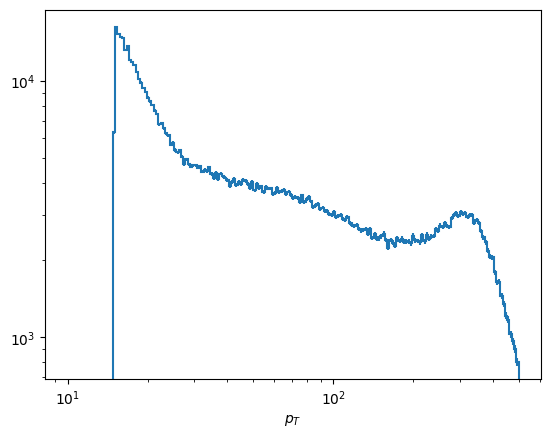

In [108]:
pt_hist.plot()
plt.loglog()

In [119]:
jet_hist = hist.Hist(hist.axis.Regular(100,0,500,name = 'pt'),
                     hist.axis.Regular(100,-3.2,3.2, name = 'phi'),
                     hist.axis.Regular(100, -5,5, label = "$\eta$", name = 'eta')
                    )

In [125]:
jets  = events.arrays(filter_name = "Jet_[pt|eta|mass|phi]*")

jets.fields

['Jet_area',
 'Jet_eta',
 'Jet_hfsigmaEtaEta',
 'Jet_hfsigmaPhiPhi',
 'Jet_mass',
 'Jet_muEF',
 'Jet_muonSubtrFactor',
 'Jet_phi',
 'Jet_pt',
 'Jet_puIdDisc',
 'Jet_electronIdx1',
 'Jet_electronIdx2',
 'Jet_hfadjacentEtaStripsSize',
 'Jet_hfcentralEtaStripSize',
 'Jet_muonIdx1',
 'Jet_muonIdx2',
 'Jet_puId']

In [121]:
jet_hist.fill(pt = ak.ravel(jets.Jet_pt),
              phi = ak.ravel(jets.Jet_phi),
              eta = ak.ravel(jets.Jet_eta)
             )

Hist(
  Regular(100, 0, 500, name='pt'),
  Regular(100, -3.2, 3.2, name='phi'),
  Regular(100, -5, 5, name='eta', label='$\\eta$'),
  storage=Double()) # Sum: 741674.0 (749311.0 with flow)

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f72fc584160>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f72fca208e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f72fd0c5550>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

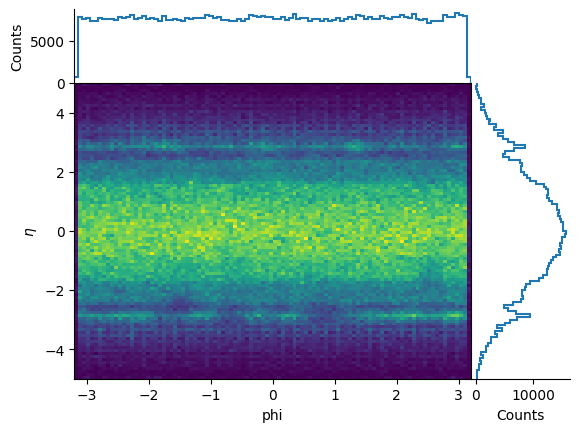

In [124]:
jet_hist[sum,:,:].plot2d_full()

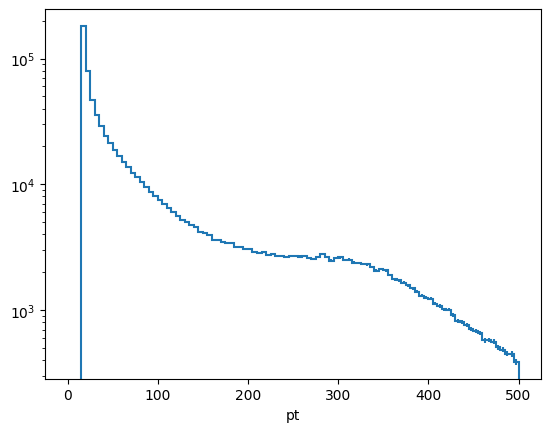

In [135]:
jet_hist[:,sum,sum].plot1d()
plt.yscale('log')